# Introduction
This notebook is a first part of [eargasm-spotify](https://github.com/adamsiemaszkiewicz/eargasm-music) repository meant to visualize data from the [eargasm music](https://open.spotify.com/user/eargasmusic?si=HtTLbkG6QoqkdKU3uTRjAQ) Spotify channel. 

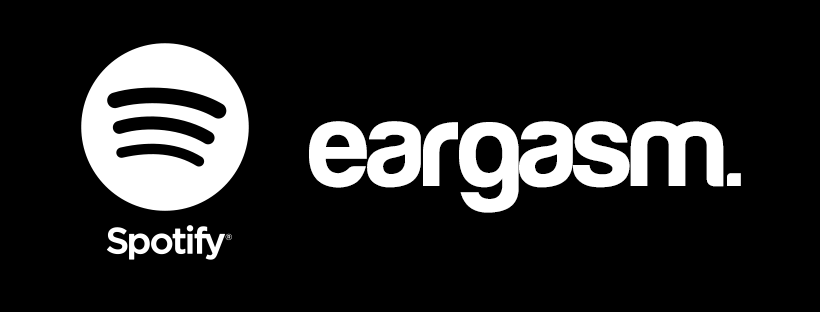

# Set up environment

## Google Drive mount

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/Colab Notebooks/eargasm-music/

/content/gdrive/My Drive/Colab Notebooks/eargasm-music


In [3]:
!ls

all_playlists.csv   basic_info.csv		      files	    README.md
audio_analysis.csv  eargasm_data-retrieval.ipynb      final_df.csv
audio_features.csv  eargasm_data-visualisation.ipynb  genres.csv


## Import libraries and functions
Let's import all the libraries and function we're gonna use throughout the notebook.

### Notebook
- `PIL` `Image` - Imagery handling
- `tqdm.notebook` `tqdm` - Progress bars

In [4]:
from tqdm.notebook import tqdm
from PIL import Image

### Data science
- `pandas` - data manipulation & analysis
- `pd.options.mode.chained_assignment` - switch off warning for chained_assignment
- `numpy` - linear algebra

In [5]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

### Visualization
- `matplotlib.pyplot` - basic visualizations
- `plotly` - advanced visualizations
- `plotly.express` - fast vizualizations
- `plotly.graph_objects` - more control over plotly figures

In [6]:
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

### WordCloud
- `WordCloud` - word cloud visualization ([link](https://github.com/amueller/word_cloud))
- `STOPWORDS` - list of words to eliminate


In [7]:
from wordcloud import WordCloud, STOPWORDS

# Load data
Let's load the data fetched from the [Eargasm Music](https://open.spotify.com/user/eargasmusic?si=cz4VzEi1RgaUup_g8-UnEg) Spotify channel using `eargasm_retrieve-data.ipynb`. The data set consists of the tracks with their features as well as a playlist name label.

In [8]:
final_df = pd.read_csv('final_df.csv', index_col=0)

In [9]:
final_df.head()

,track_id,track_artist,track_artistid,track_name,track_duration,track_popularity,track_releasedate,track_preview,track_image,track_url,track_playlist,track_genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,key,key_confidence,mode,mode_confidence,number_of_sections,tempo,tempo_confidence,time_signature,time_signature_confidence
0,1ua6hBq18qZLyprXjMcpyf,Virgil Howe,6d3Hil7Y1xq0oEhtaDxEUg,Someday,251266,43,2009-10-19,https://p.scdn.co/mp3-preview/a2bdcba6acda937f...,https://i.scdn.co/image/ab67616d0000b27356dc5e...,https://open.spotify.com/track/1ua6hBq18qZLypr...,eargasm | breathe easy,NaN,0.370,0.483,0.462,0.210000,0.0875,0.0290,0.351,9.0,0.292,0.0,0.398,12.0,86.502,0.160,4.0,1.000
1,42VpxSdGQgnV1UJkWeGYkA,Cass McCombs,2iUVQjheBnvOt8vaBrxXJz,Switch,254233,52,2016-08-26,https://p.scdn.co/mp3-preview/d0feea85b84ce9f5...,https://i.scdn.co/image/ab67616d0000b27396782c...,https://open.spotify.com/track/42VpxSdGQgnV1UJ...,eargasm | breathe easy,alternative country,0.362,0.682,0.538,0.000123,0.3240,0.0283,0.713,7.0,0.743,0.0,0.453,12.0,98.003,0.583,4.0,1.000
2,1g8A166soQjwl1ihqBWKGW,The Slow Revolt,7cfCmW2AFiMNdpJdY0vJsr,Lean,207699,0,2016-09-09,NaN,https://i.scdn.co/image/ab67616d0000b273ce48d6...,https://open.spotify.com/track/1g8A166soQjwl1i...,eargasm | breathe easy,vapor pop,0.195,0.536,0.753,0.801000,0.1200,0.0309,0.676,1.0,0.655,1.0,0.368,12.0,85.036,0.325,4.0,0.979
3,6cAVWcj8TQ5yR2T6BZjnOg,Dirty Nice,4MGA6AM4iZ2HYc6b77og9g,Zero Summer,212640,0,2017-06-09,NaN,https://i.scdn.co/image/ab67616d0000b2733a028c...,https://open.spotify.com/track/6cAVWcj8TQ5yR2T...,eargasm | breathe easy,NaN,0.742,0.663,0.509,0.000006,0.1120,0.0889,0.303,11.0,0.547,1.0,0.560,12.0,125.088,0.476,4.0,0.845
4,3YA509E9ki7a3Ic9cf25Vt,Alex Ebert,1me05HW5s7TShHra5nN7uE,Broken Record,274800,47,2017-05-05,https://p.scdn.co/mp3-preview/96c62ba3b9d730d3...,https://i.scdn.co/image/ab67616d0000b2738a6904...,https://open.spotify.com/track/3YA509E9ki7a3Ic...,eargasm | breathe easy,alternative americana,0.240,0.464,0.570,0.001210,0.1380,0.0400,0.548,0.0,0.905,1.0,0.753,12.0,170.556,0.183,4.0,0.799


## Clean, convert & fill missing data

### Track duration
Spotify API let's you fetch the `track_duration` in ms (miliseconds). Let's convert it to seconds for a better readibility. 

***Disclaimer:*** *`timedelta64` is not an option due to problems with `plotly` library)*

In [10]:
final_df['track_duration'] = final_df['track_duration'].apply(lambda x: (x/1000))
final_df['track_duration']

0       251.266
1       254.233
2       207.699
3       212.640
4       274.800
         ...   
3616    228.000
3617    239.458
3618    344.969
3619    297.752
3620    222.148
Name: track_duration, Length: 3621, dtype: float64

### Track release date
Spotify API lets you fetch the release dates with a varying precisions. It's either `YYYY-MM-DD`, `YYYY-MM` or `YYYY`. Let's convert `track_releasedate` values do `datetime`.

In [11]:
final_df['track_releasedate'] = pd.to_datetime(final_df['track_releasedate'])
final_df['track_releasedate']

0      2009-10-19
1      2016-08-26
2      2016-09-09
3      2017-06-09
4      2017-05-05
          ...    
3616   2018-02-27
3617   2017-11-15
3618   2018-03-02
3619   2018-01-26
3620   2020-02-21
Name: track_releasedate, Length: 3621, dtype: datetime64[ns]

# Data visualization
Let's explore the data we're dealing with to a better insight.

1. Most popular artists
2. Most popular genres

## Most popular artists
Let's visualize the most popular artists in the database using:
- Pandas
- Bar chart
- Word cloud

### Pandas
Let's fetch top 20 artists according to their occurance in the database using `value_counts()`

In [12]:
final_df['track_artist'].value_counts()[:20]

Tourist                 28
Christian Löffler       23
Folamour                19
Weval                   18
Model Man               16
Blutch                  15
Parra for Cuva          15
Seb Wildblood           13
Monster Rally           13
Rival Consoles          13
Ben Böhmer              13
Jesper Ryom             12
Brock Berrigan          12
Four Tet                12
Disclosure              12
Maribou State           12
Leon Vynehall           12
Bibio                   12
Shakarchi & Stranéus    11
HNNY                    11
Name: track_artist, dtype: int64

### Bar chart
Let's visualize the list of top artists using `plotly.treemap()`

1. Create the `layout` element for layout annotations
2. Create the `figure` element to create `go.Bar()` trace and assign layout
3. Show the figure

In [13]:
layout = go.Layout(
                   title=go.layout.Title(text="Top 20 aritsts"),
                   xaxis=go.layout.XAxis(title='Artist name'),
                   yaxis=go.layout.YAxis(title='Number of occurances')
                  )
fig = go.Figure(
    go.Bar(
        x=final_df['track_artist'].value_counts().index[:20],
        y=final_df['track_artist'].value_counts().values[:20]
          ),
    layout=layout
               )
fig.show()

### Word cloud
Let's visualize the artist count using `WordCloud`. The bigger and darker the font is, the more frequently the artist occurs in the database.

1. Create a list of all values of `track_artist` column, shuffle it to avoid errors and collapse into a single string to use with `WordCloud`.
2. Import image file using SIL `Image` and convert in into `np.array` for later use as a mask
3. Create a rectangular `matplotlib` figure as a container for the word cloud.
4. Create a `WordCloud()` object with some customizations including colours, font and output transparency. 
5. Show the word cloud

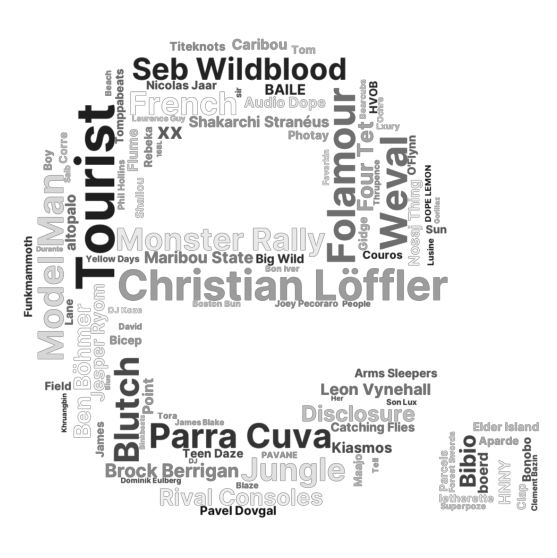

In [14]:
artists = final_df['track_artist'].values.tolist()
np.random.shuffle(artists)
artists_string = '\n'.join(artists)

mask = np.array(Image.open('files/eargasm-mask.png'))

plt.figure(figsize=(10,10))

artists_wordcloud = WordCloud(
                              stopwords=STOPWORDS,
                              width=1024,
                              height=1024,
                              background_color=None,
                              mode='RGBA',
                              max_words=100,
                              min_font_size=5,
                              max_font_size=100,
                              scale=1,
                              random_state=999,
                              colormap='Greys',
                              mask=mask,
                              font_path='files/Inter-Bold.otf',
                              prefer_horizontal=0.5
                              ).generate(artists_string)

plt.imshow(artists_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most popular genres
Let's visualize the most popular artists in the database using:
- Pandas
- Bar chart
- Word cloud

### Pandas
Let's fetch top 20 genres according to their occurance in the database using `value_counts()`

In [15]:
final_df['track_genre'].value_counts()[:20]

chillhop                 131
electronica              126
chillwave                123
deep house               119
alternative dance        111
art pop                   83
bass music                67
downtempo                 63
electropop                59
alternative r&b           56
vapor soul                56
ambient                   44
french indietronica       42
aussietronica             39
progressive house         36
float house               35
new french touch          34
ambient house             32
french indie pop          32
compositional ambient     32
Name: track_genre, dtype: int64

### Bar chart
Let's visualize the list of top genres using `plotly.treemap()`

1. Create the `layout` element for layout annotations
2. Create the `figure` element to create `go.Bar()` trace and assign layout
3. Show the figure

In [16]:
layout = go.Layout(
                   title=go.layout.Title(text="Top 20 genres"),
                   xaxis=go.layout.XAxis(title='Genre'),
                   yaxis=go.layout.YAxis(title='Number of occurances')
                  )
fig = go.Figure(
    go.Bar(
        x=final_df['track_genre'].value_counts().index[:20],
        y=final_df['track_genre'].value_counts().values[:20]
          ),
    layout=layout
               )
fig.show()

### Word cloud
Let's visualize the genres count using `WordCloud`. The bigger and darker the font is, the more frequently the genre occurs in the database.

1. Create a list of all values of `track_genre` column, shuffle it to avoid errors and collapse into a single string to use with `WordCloud`.
2. Import image file using SIL `Image` and convert in into `np.array` for later use as a mask
3. Create a rectangular `matplotlib` figure as a container for the word cloud.
4. Create a `WordCloud()` object with some customizations including colours, font and output transparency. 
5. Show the word cloud

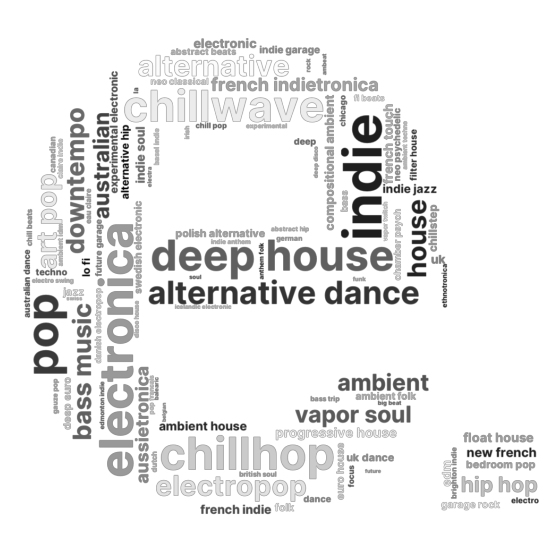

In [17]:
genres = final_df['track_genre'].dropna().values.tolist()
np.random.shuffle(genres)
genres_string = '\n'.join(genres)

mask = np.array(Image.open('files/eargasm-mask.png'))

plt.figure(figsize=(10,10))

genres_wordcloud = WordCloud(
                              stopwords=STOPWORDS,
                              width=1024,
                              height=1024,
                              background_color=None,
                              mode='RGBA',
                              max_words=100,
                              min_font_size=5,
                              max_font_size=100,
                              scale=1,
                              random_state=999,
                              colormap='Greys',
                              mask=mask,
                              font_path='files/Inter-Bold.otf',
                              prefer_horizontal=0.5
                              ).generate(genres_string)

plt.imshow(genres_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most popular songs
Let's explore the most popular songs in the dataset. To do so, narrow down `final_df` DataFrame to essential columns, sort it by `track_popularity` and remove duplicate songs with `drop_duplicates()` Pandas method.

In [18]:
most_popular = final_df[['track_artist', 'track_name', 'track_popularity']]
most_popular = most_popular.sort_values(by=['track_popularity'], ascending=False).drop_duplicates()
most_popular[:20]

,track_artist,track_name,track_popularity
650,Mac Miller,Blue World,74
3404,Bon Iver,"Hey, Ma",70
2900,Home,Resonance,70
2079,KAYTRANADA,10%,68
2310,boy pablo,Feeling Lonely,68
2240,Tash Sultana,Jungle,68
310,Jordan Rakei,Midnight Mischief - Tom Misch Remix,66
2427,Lord Echo,Thinking of You,65
3346,Charlotte Day Wilson,Work,65
2298,Tame Impala,Patience,65


## Basic statistics
Let's explore the audio features of the tracks in the dataset. 

### Prepare data
1. Create a list of audio features to explore.
2. Create a DataFrame based on the list
3. Simplify `track_playlist` values by removing `eargasm | ` bit

In [19]:
audio_features_list = ['track_playlist',
                       'track_duration',
                       'track_popularity',
                       'track_releasedate',
                       'acousticness',
                       'danceability',
                       'energy',
                       'instrumentalness',
                       'liveness',
                       'speechiness',
                       'tempo',
                       'valence']
                       
features_df = final_df[audio_features_list]

features_df['track_playlist'] = features_df['track_playlist'].apply(lambda x: x.split(' | ')[1])

### Interactive box plot
Let's create an interacitve box plot using `plotly` library. The graph is supposed to visualize the statistical representation of feature data:
- minimum and maximum data points (excluding outliers)
- median (the middle value) of the dataset
- first quartile (the median of the lower half of the dataset)
- third quartile (the median of the upper half of the dataset)
- outliers (data points that differs significantly from other observations)

The box plot allows you to choose the feature you want to explore. The default value is set to `valence`. By clicking on the playlist name in the legend you can hide/unhide certain playlist.

1. `initial_data` is a list of `plotly.graph_objects.Box` figures for each playlist name created using a list comprehension.
2. `updatemenus` is a list of dropdown menus. The menu is made using list comprehension and update values `y` from `go.Box()` element (y-axis values) and `yaxis` from `go.Layout()` element (y-axis title).
3. `annotations` is a list of dictionaries containing additional annotations, each as a dictionary of key/values.
4. `layout` is the `go.Layout()` element specifying layout settings and elements
5. `fig` is the `go.Figure()` element creating a figure based on layout and data

In [20]:
initial_data = [
                go.Box(
                       x = features_df['track_playlist'].where(features_df['track_playlist'] == name),
                       y = features_df['acousticness'].where(features_df['track_playlist'] == name),
                       notched=True,
                       showlegend=True,
                       name=name,
                       boxpoints='outliers',

                      ) for name in features_df['track_playlist'].unique()
               ]
                     

updatemenus = [
               dict(
                    buttons=list([
                                  dict(
                                  label=feat,
                                  method='update',
                                  args=[{'y': [features_df[feat]]}, {'yaxis': dict(title=feat)}] 
                                  ) for feat in audio_features_list[1:]
                                ]),
                    direction='down',
                    pad={'r': 10, 't': 10},
                    showactive=True,
                    x=0.15,
                    xanchor='left',
                    y=1.1,
                    yanchor='top'
                   )
              ]

annotations = [
               dict(text='Choose a feature to explore',
                    showarrow=False,
                    x=0,
                    y=1.07,
                    yref='paper',
                    xref='paper',
                    align='left'),
               dict(text="Click a playlist name to (un)hide",
                    showarrow=False,
                    x=1,
                    y=1.07,
                    yref='paper',                  
                    xref='paper',
                    align='right')
              ]

layout = go.Layout(
                   title=go.layout.Title(text="Box plots", x=0.5),
                   height=800,
                   showlegend=True,
                   updatemenus=updatemenus,
                   annotations=annotations,
                   xaxis=go.layout.XAxis(title='playlist name'),
                   yaxis=go.layout.YAxis(title='acousticness')
                  )

fig = go.Figure(
                data=initial_data,
                layout=layout
               )

fig.show()

## Correlations
Let's explore the correlation between audio features of the tracks using plotly's `go.Heatmap()` object. 

### Prepare data
1. Create a list of audio features to explore.
2. Create a DataFrame based on the list
3. Simplify `track_playlist` values by removing `eargasm | ` bit

In [21]:
audio_features_list = ['track_playlist',
                       'acousticness',
                       'danceability',
                       'energy',
                       'instrumentalness',
                       'liveness',
                       'speechiness',
                       'valence']
                       
audio_features_df = final_df[audio_features_list]

audio_features_df['track_playlist'] = audio_features_df['track_playlist'].apply(lambda x: x.split(' | ')[1])

### Correlation heatmap
FIrst let's explore the correlation between audio features of the tracks using plotly's `go.Heatmap()` object to see what are the relationships between each feature.

In [22]:
figure = go.Heatmap(
                    z=audio_features_df[audio_features_list[1:]].corr(),
                    x=audio_features_list[1:],
                    y=audio_features_list[1:],
                    colorscale='Viridis',
                    zmax=1,
                    zmin=-1,
                    zmid=0
                   )                      

layout = go.Layout(
                   title=go.layout.Title(text="Correlation heatmap", x=0.5),
                   width=860,
                   height=860
                  )

fig = go.Figure(
                data=figure,
                layout=layout
               )
fig.show()

### Distribution and density
Let's visualize our entire dataset density and distribution aggregated by selected features. I'll combine three different types of charts on one figure:
- `go.Scatter()` - scatter plot representing a position of each individual track *(white dots)*
- `go.Histogram()` - two histograms representing a distribution of data for each selected feature (number of tracks within a certain range of values - interval)
- `go.Histogram2d()` - density heatmap representing a product of two overlayed histogram in a form of a heatmap

1. Create `figure` container with four above mentioned traces
2. Create `updatemenus` container with two dropdown menus to change data
3. Create `annotations` container with some additional annotations
4. Create `layout` object with some layout settings and extra elements
5. Create `figure` object to put `figure` and `layout` together




In [23]:
figure = [
          go.Scatter(              
              x=features_df['danceability'],
              y=features_df['valence'],
              xaxis = 'x',
              yaxis = 'y',
              mode='markers',
              text = 'playlist: ' + features_df['track_playlist'],
              marker=dict(
                  symbol='circle',
                  color='white',
                  size=2
                         )
                    ),          
          go.Histogram(
              y = features_df['valence'],
              xaxis = 'x2',
              orientation = 'h',
              marker = dict(color = '#0d0887')                       
                      ),
          go.Histogram(
              x = features_df['danceability'],
              yaxis = 'y2',
              orientation = 'v',
              marker = dict(color = '#0d0887')                       
                      ),
          go.Histogram2d(
              x=features_df['danceability'],
              y=features_df['valence'],
              xaxis = 'x',
              yaxis = 'y',
              zsmooth='best',
              hoverinfo='skip'
                        )
         ]

updatemenus = list([
    dict(
         x=-0.05,
         y=0.8,
         buttons=list([
              dict(
                   label=feat,
                   method='update',
                   args=[
                         {'x': [features_df[feat]]},
                         {'xaxis': dict(title=feat, domain=[0,0.8], range=[0,1]), 'xaxis2': dict(domain=[0.82,1])}
                        ] 
                  ) for feat in audio_features_list[1:]
                      ])
        ),
    dict(
         x=-0.05,
         y=0.95,
         buttons=list([
              dict(
                   label=feat,
                   method='update',
                   args=[
                         {'y': [features_df[feat]]},
                         {'yaxis': dict(title=feat, domain=[0,0.8], range=[0,1]), 'yaxis2': dict(domain = [0.82,1])}
                        ] 
                  ) for feat in audio_features_list[1:]
                      ])
        )
    ])   

annotations=[
             dict(text="Feature 1",
                  showarrow=False,
                  x=-0.15,
                  y=1,
                  yref='paper',
                  xref='paper',
                  align='left'),
             dict(text="Feature 2",
                  showarrow=False,
                  x=-0.15,
                  y=0.85,
                  yref='paper',
                  xref='paper',
                  align='left')
           ]

layout = go.Layout(
                   title=go.layout.Title(text="Density heatmap", x=0.5),
                   width=1000,
                   height=860,
                   autosize=False,
                   bargap=0,
                   showlegend=False,
                   updatemenus=updatemenus,
                   annotations=annotations,
                   xaxis = dict(
                       title='danceability',
                       zeroline=False,
                       domain=[0,0.8],
                       range=[0,1],
                       showgrid=False
                               ),
                   xaxis2 = dict(
                       zeroline = False,
                       domain = [0.82,1],
                       showgrid = False
                                ),
                   yaxis = dict(
                       title='valence',
                       zeroline=False,
                       domain=[0,0.8],
                       range=[0,1],
                       showgrid=False
                               ),
                   yaxis2 = dict(
                       zeroline = False,
                       domain = [0.82,1],
                       showgrid = False
                                )
                  )

fig = go.Figure(
                data=figure,
                layout=layout
               )

fig.show()

## Comparison
Let's visualize some graphs to compare the playlists.

### Radar chart
Let's visualize multivariate data (playlists' features) in the form of two-dimensional chart, using the mean value of each feature.

1. Set initial playlists to display
2. Create traces for both visible and hidden traces using `go.Scatterpolar()`
3. Create `annotations` element for extra annotations
4. Create `layout` element to set options of the figure
5. Display a figure

In [24]:
initial_playlists = ['sunny days', 'weightless', 'sky gazing']
initial_data = []

for playlist in features_df['track_playlist'].unique():
  if playlist in initial_playlists:
    initial_data.append(
        go.Scatterpolar(
            r=[
               features_df.loc[features_df['track_playlist'] == playlist][feat].mean() for feat in audio_features_list[1:]
              ],
              theta=audio_features_list[1:],
              fill='toself',
              name=playlist
                       ))
  else: 
    initial_data.append(
        go.Scatterpolar(
            r=[
               features_df.loc[features_df['track_playlist'] == playlist][feat].mean() for feat in audio_features_list[1:]
              ],
              theta=audio_features_list[1:],
              fill='toself',
              name=playlist,
              visible='legendonly'
                       ))

annotations = [
               dict(text="Click a playlist name to (un)hide",
                    showarrow=False,
                    x=0.5,
                    y=1,
                    yref='paper',                  
                    xref='paper',
                    align='right')
              ]                      

layout = go.Layout(
                   title=go.layout.Title(text="Radar chart", x=0.5),
                   width=860,
                   height=860,
                   legend=dict(x=1.2, y=0.5),
                   polar=dict(
                       radialaxis=dict(
                                       visible=True,
                                       range=[0, 1]
                                      )
                             ),
                   annotations=annotations
                  )

fig = go.Figure(
                data=initial_data,
                layout=layout
               )

fig.show()

### Comparison scatter
Let's visualize the playlists' track as a 2d comparison scatter.

1. Define a function which filters out the tracks belonging to a specified playlist.
2. Create a list of playlist names
3. Create a dictionary of playlist DataFrames using `single_playlist_df()` function
4. Create a function to loops through the dictionary of DataFrames and create either visible or hidden traces for each of the playlists.
5. Set a list of features to include in the comparison 
6. Create a dictionary of feature values for each DataFrame
7. Create a list of dropdown menus - `updatemenus`
8. Set initial state of the graph - `initial_data` 
9. Add extra annotations - `annotations`
10. Set layout settings and add extra elements - `layout`
11. Put everything together - `fig`

In [25]:
def single_playlist_df(playlist_name):  
  df = final_df.loc[final_df['track_playlist'] == playlist_name]
  return df
  
playlist_names = final_df['track_playlist'].unique()

dfs = {}
for name in playlist_names:
  dfs[name] = single_playlist_df(name)

def make_traces(feature1, feature2, dfs):
  traces = []
  for name, df in dfs.items():
    name_stripped = name.split(' | ')[1]
    initial_playlists = ['curvatronik', 'kickin\' it ol\' skool', 'glide', 'weightless']
    if name_stripped in initial_playlists:
      traces.append(go.Scatter(x=df[feature1],
                              y=df[feature2],
                              mode='markers',
                              name=name_stripped,
                              text = df['track_artist'] + ' - ' + df['track_name']))
    else:
      traces.append(go.Scatter(x=df[feature1],
                              y=df[feature2],
                              mode='markers',
                              name=name_stripped,
                              visible='legendonly',
                              text = df['track_artist'] + ' - ' + df['track_name']))

  return traces

features = ['acousticness',
            'danceability',
            'energy',
            'instrumentalness',
            'liveness',
            'speechiness',
            'valence',
            'track_duration',
            'track_popularity',
            'key',
            'mode',
            'tempo',
            'time_signature']

data = dict()
for feat in features:
  data[feat] = [df[feat] for df in dfs.values()]

updatemenus = list([
    dict(x=-0.05,
         y=0.8,
         buttons=list([
              dict(
                   label=feat,
                   name='Feature 1',
                   method='update',
                   args=[{'x': data[feat]}, {'xaxis': dict(title=feat)}]
                   ) for feat in features
                      ])
        ),
    dict(x=-0.05,
         y=0.95,
         buttons=list([
              dict(
                   label=feat,
                   name='Feature 2',
                   method='update',
                   args=[{'y': data[feat]}, {'yaxis': dict(title = feat)}]
                   ) for feat in features
                      ])
        )
    ])


initial_data = make_traces('energy', 'instrumentalness', dfs)


annotations=[
             dict(text="Feature 1",
                  showarrow=False,
                  x=-0.16,
                  y=1,
                  yref='paper',
                  xref='paper',
                  align='left'),
             dict(text="Feature 2",
                  showarrow=False,
                  x=-0.16,
                  y=0.85,
                  yref='paper',
                  xref='paper',
                  align='left')
           ]

layout = go.Layout(
                   title=go.layout.Title(text='Comparison of feature pairs', x=0.5),
                   height=750,
                   showlegend=True,
                   updatemenus=updatemenus,
                   annotations=annotations,
                   xaxis=go.layout.XAxis(title='energy'),
                   yaxis=go.layout.YAxis(title='instrumentalness')
                  )

fig = go.Figure(
                data=initial_data,
                layout=layout
               )


fig.show()